# 1. Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

print("Tensorflow Version : ", tf.__version__)
print("Keras Version : ", keras.__version__)

Using TensorFlow backend.


Tensorflow Version :  1.15.0
Keras Version :  2.2.4-tf


# 2. GPU Setting

In [2]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# [참고] https://datamasters.co.kr/33
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

# 3. Data Setting

In [3]:
dir_data = "C:/Users/User/Desktop/Project/Full_Ver1.0/" # 데이터 경로
filenames = os.listdir(dir_data)
filenames

['Capture_off (1).png',
 'Capture_off (10).png',
 'Capture_off (100).png',
 'Capture_off (101).png',
 'Capture_off (102).png',
 'Capture_off (103).png',
 'Capture_off (104).png',
 'Capture_off (105).png',
 'Capture_off (106).png',
 'Capture_off (107).png',
 'Capture_off (108).png',
 'Capture_off (109).png',
 'Capture_off (11).png',
 'Capture_off (110).png',
 'Capture_off (111).png',
 'Capture_off (112).png',
 'Capture_off (113).png',
 'Capture_off (114).png',
 'Capture_off (115).png',
 'Capture_off (116).png',
 'Capture_off (117).png',
 'Capture_off (118).png',
 'Capture_off (119).png',
 'Capture_off (12).png',
 'Capture_off (120).png',
 'Capture_off (121).png',
 'Capture_off (122).png',
 'Capture_off (123).png',
 'Capture_off (124).png',
 'Capture_off (125).png',
 'Capture_off (126).png',
 'Capture_off (127).png',
 'Capture_off (128).png',
 'Capture_off (129).png',
 'Capture_off (13).png',
 'Capture_off (130).png',
 'Capture_off (131).png',
 'Capture_off (132).png',
 'Capture_off (133

In [4]:
categories=[]
for filename in filenames:
    
    category = filename.split(" ")[0]
    
    if (category == "RMFD-1_on") or (category == "Capture_on"):
        categories.append(1)
        
    elif (category == "RMFD-1_off") or (category == "Capture_off"):
        categories.append(0)
        
data_df = pd.DataFrame({'FileName':filenames, 'Category':categories})

# 이미지 제너레이터에서 class_mode='categorical'로 지정하기 위해 컬럼을 string으로 변경함
data_df['Category'] = data_df['Category'].replace({0:"mask_off", 1:"mask_on"})
data_df

,FileName,Category
0,Capture_off (1).png,mask_off
1,Capture_off (10).png,mask_off
2,Capture_off (100).png,mask_off
3,Capture_off (101).png,mask_off
4,Capture_off (102).png,mask_off
5,Capture_off (103).png,mask_off
6,Capture_off (104).png,mask_off
7,Capture_off (105).png,mask_off
8,Capture_off (106).png,mask_off
9,Capture_off (107).png,mask_off


In [5]:
train_df, validation_df = train_test_split(data_df, test_size=0.2, stratify=data_df['Category'], random_state=42) 

train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

# 4. Modeling

In [6]:
from keras.models import Sequential
from keras.layers import *

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

model_name = "C:/Users/User/Desktop/Project/Model/MaskCheckModel_Ver1.1.h5"

In [7]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 109, 109, 128)     512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)       0         
__________

# 5. Training

In [8]:
batch_size = 32

In [10]:
# [참고] https://3months.tistory.com/199

train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.3,
    rescale=1./255
)

train_generator = train_datagen.flow_from_dataframe( # flow_from_directory
    train_df,
    dir_data,
    x_col = 'FileName',
    y_col = 'Category',
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size
)

Found 10410 validated image filenames belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    dir_data,
    x_col = 'FileName',
    y_col = 'Category',
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size
)

Found 2603 validated image filenames belonging to 2 classes.


In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

earlystop = EarlyStopping(monitor='val_loss', min_delta=0.01, mode='min', patience=10)

# [참고] https://teddylee777.github.io/tensorflow/keras-%EC%BD%9C%EB%B0%B1%ED%95%A8%EC%88%98-vol-01
# ReduceLROnPlateau : loss가 더이상 개선되지 않으면 lr을 감소시킴
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=0.00001, verbose=1)
# factor: factor by which the learning rate will be reduced. new_lr = lr * factor

# [참고] https://blog.naver.com/PostView.nhn?blogId=cjh226&logNo=221468928164&redirect=Dlog&widgetTypeCall=true&directAccess=false
checkpoint = ModelCheckpoint(model_name, monitor='val_loss', mode='min', save_best_only=True)

callbacks=[earlystop, learning_rate_reduction, checkpoint]

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
total_train = train_df.shape[0]
total_validation = validation_df.shape[0]

history = model.fit_generator(
    train_generator,
    epochs = 100,
    steps_per_epoch = total_train // batch_size,
    validation_data = validation_generator,
    validation_steps = total_validation // batch_size,
    callbacks = callbacks
)

Epoch 1/100
325/325 [==============================] - 217s 666ms/step - loss: 0.3500 - acc: 0.9114 - val_loss: 0.1089 - val_acc: 0.9568
Epoch 2/100
325/325 [==============================] - 217s 666ms/step - loss: 0.1783 - acc: 0.9386 - val_loss: 0.1041 - val_acc: 0.9662
Epoch 3/100
325/325 [==============================] - 218s 672ms/step - loss: 0.1502 - acc: 0.9495 - val_loss: 0.1032 - val_acc: 0.9580
Epoch 4/100
325/325 [==============================] - 214s 659ms/step - loss: 0.1468 - acc: 0.9514 - val_loss: 2.5720 - val_acc: 0.4333
Epoch 5/100
325/325 [==============================] - 213s 655ms/step - loss: 0.1333 - acc: 0.9549 - val_loss: 0.0770 - val_acc: 0.9716
Epoch 6/100
325/325 [==============================] - 214s 657ms/step - loss: 0.1210 - acc: 0.9612 - val_loss: 0.0577 - val_acc: 0.9825
Epoch 7/100
325/325 [==============================] - 213s 657ms/step - loss: 0.1127 - acc: 0.9631 - val_loss: 0.0621 - val_acc: 0.9841
Epoch 8/100
325/325 [====================

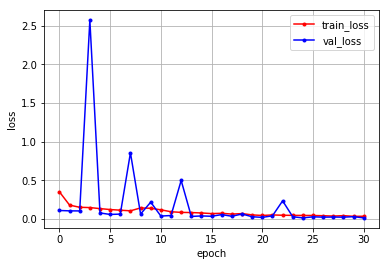

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

xLen = np.arange(len(loss))
plt.plot(xLen, loss, marker=".", c='red', label="train_loss")
plt.plot(xLen, val_loss, marker=".", c='blue', label="val_loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

# 6. Model Save

In [22]:
# from keras.models import load_model

# model.save(model_name)